In [1]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

air = pd.read_csv("1h_sampled_data.csv")

#convert appropriate columns to datetime format
air['time'] = pd.to_datetime(air['time'], yearfirst=True, utc = True)
air['sunrise'] = pd.to_datetime(air['sunrise'], yearfirst=True, utc = True)
air['sunset'] = pd.to_datetime(air['sunset'], yearfirst=True, utc = True)
air['noon'] = pd.to_datetime(air['noon'], yearfirst=True, utc = True)

#preserve date info when using 'time' as index
air['date'] = air['time']
air.set_index('time', inplace = True)
air.index = air.index.tz_convert("Europe/Zurich")

,temp_pi,hum_pi,PM1_pi,PM2.5_pi,PM10_pi,temp_blue,precip,hum_blue,wind_speed,wind_direction,...,hum_sbs,wind,pressure,PM2.5,PM10,AQI,sunrise,noon,sunset,daylight
time,,,,,,,,,,,,,,,,,,,,,
2021-03-23 10:00:00+01:00,8.316667,53.283333,6.042500,11.798333,17.710000,3.106314,0.0,76.0,5.116561,50.710600,...,65.0,3.7,1025.0,16.0,24.3,59.0,2021-03-23 05:22:52.709917+00:00,2021-03-23 11:32:27+00:00,2021-03-23 17:42:36.960331+00:00,0 days 12:19:44.250414
2021-03-23 11:00:00+01:00,13.408333,38.358333,4.840833,10.010000,15.388333,5.416314,0.0,67.0,6.924738,62.102737,...,65.0,3.7,1025.0,14.0,20.9,55.0,2021-03-23 05:22:52.709917+00:00,2021-03-23 11:32:27+00:00,2021-03-23 17:42:36.960331+00:00,0 days 12:19:44.250414
2021-03-23 12:00:00+01:00,17.391667,32.191667,5.140833,7.510833,9.632500,7.216313,0.0,55.0,7.421590,67.166336,...,57.0,14.8,1025.0,12.0,17.3,50.0,2021-03-23 05:22:52.709917+00:00,2021-03-23 11:32:27+00:00,2021-03-23 17:42:36.960331+00:00,0 days 12:19:44.250414
2021-03-23 13:00:00+01:00,18.650000,30.083333,3.752500,6.064167,8.284167,8.656314,0.0,48.0,6.952755,68.749500,...,57.0,14.8,1025.0,NaN,NaN,27.0,2021-03-23 05:22:52.709917+00:00,2021-03-23 11:32:27+00:00,2021-03-23 17:42:36.960331+00:00,0 days 12:19:44.250414
2021-03-23 14:00:00+01:00,19.983333,28.125000,4.610000,10.042500,15.750000,9.586313,0.0,39.0,11.269782,63.434950,...,40.0,11.1,1025.0,11.0,16.2,45.0,2021-03-23 05:22:52.709917+00:00,2021-03-23 11:32:27+00:00,2021-03-23 17:42:36.960331+00:00,0 days 12:19:44.250414


In [13]:
# Rearrange data based on plotting needs
air_melt_hum = pd.melt(air, value_vars = ['hum_pi', 'hum_blue', 'hum_sbs'], ignore_index = False)


air_melt_PM = pd.melt(air, id_vars = 'date', value_vars = ['PM1_pi', 'PM2.5_pi', 'PM10_pi', 'PM2.5','PM10'], ignore_index = False)
air_melt_PM['date'] = pd.to_datetime(air_melt_PM['date'], yearfirst=True, utc = True)


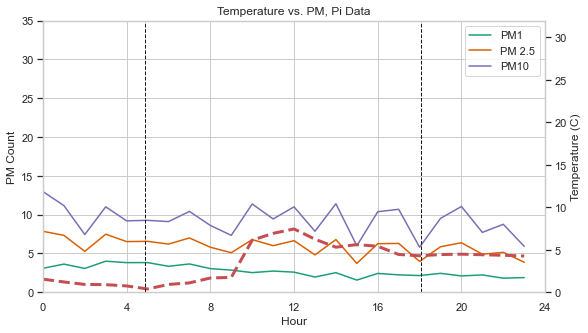

In [14]:
### Single-Day Plot: Humidity vs. PM (PI ONLY)

#get data into correct format, choose day
air_sampled = air.query('date.dt.day == [7]')
air_sampled = air_sampled[['date', 'temp_pi', 'hum_pi','PM1_pi', 'PM2.5_pi', 'PM10_pi', 'sunrise', 'sunset']]
air_melt = pd.melt(air_sampled[['date','PM1_pi', 'PM2.5_pi', 'PM10_pi']], id_vars = 'date')

## Plot PM Data using long format
sns.set_theme(style = "whitegrid")
sns.set_context("notebook")

fig, ax = plt.subplots()
fig.set_size_inches([9, 5])

g1 = sns.lineplot(data = air_melt, x = air_melt['date'].dt.hour, y = 'value',  
                   hue = 'variable', palette = "Dark2", ci = None)

g1.set(xlabel = "Hour", ylabel = "PM Count", 
        xlim=(0, 24), xticks = [0,4,8,12,16,20,24],
        ylim=(0, 35), yticks = [0,5,10,15,20,25,30,35])

plt.title('Temperature vs. PM, Pi Data')
plt.xticks(rotation = 0);
plt.legend(['PM1', 'PM 2.5', 'PM10'])

## Plot Temperature Data overlay using original format
ax2 = plt.twinx()
g2 = sns.lineplot(data = air_sampled, x = air_sampled['date'].dt.hour, y = 'temp_pi',
                  color = "r", linewidth = 3,linestyle ='dashed',
                  ax = ax2, ci = None)

# add sunrise/sunset info... a bit hackey
plt.axvline(x = air_sampled['sunrise'][0].hour + air_sampled['sunrise'][0].minute/60, 
            color = "k", linestyle ='dashed', linewidth = 1)
plt.axvline(x = air_sampled['sunset'][0].hour + air_sampled['sunset'][0].minute/60, 
            color = "k", linestyle ='dashed', linewidth = 1)

g2.set(xlabel = "Hour", ylabel = "Temperature (C)", 
       xlim=(0, 24), xticks = [0,4,8,12,16,20,24],
       ylim=(0, 32), yticks = [0,5,10,15,20,25,30])

plt.xticks(rotation = 0); 
ax2.grid(False)

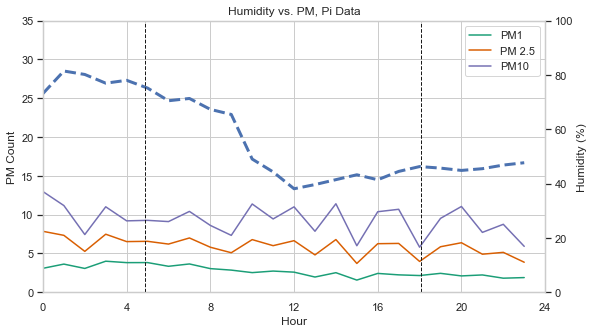

In [4]:
## Single-Day Plot: Humidity vs. PM (PI ONLY)
fig, ax = plt.subplots()
fig.set_size_inches([9, 5])

g1 = sns.lineplot(data = air_melt, x = air_melt['date'].dt.hour, y = 'value', 
                   hue = 'variable', palette = "Dark2", ci = None)

g1.set(xlabel = "Hour", ylabel = "PM Count", 
        xlim=(0, 24), xticks = [0,4,8,12,16,20,24],
        ylim=(0, 35), yticks = [0,5,10,15,20,25,30,35])

plt.xticks(rotation = 0);
plt.legend(['PM1', 'PM 2.5', 'PM10'])
plt.title('Humidity vs. PM, Pi Data')

ax3 = plt.twinx()
g3 = sns.lineplot(data = air_sampled, x = air_sampled['date'].dt.hour, y = 'hum_pi', 
                  color = 'b', linewidth = 3,linestyle ='dashed', 
                  ax = ax3, ci = None)

plt.axvline(x = air_sampled['sunrise'][0].hour + air_sampled['sunrise'][0].minute/60, 
            color = "k", linestyle ='dashed', linewidth = 1)
plt.axvline(x = air_sampled['sunset'][0].hour + air_sampled['sunset'][0].minute/60, 
            color = "k", linestyle ='dashed', linewidth = 1)

g3.set(xlabel = "Hour", ylabel = "Humidity (%)", 
       xlim=(0, 24), xticks = [0,4,8,12,16,20,24],
       ylim=(0, 100))

ax3.grid(False)


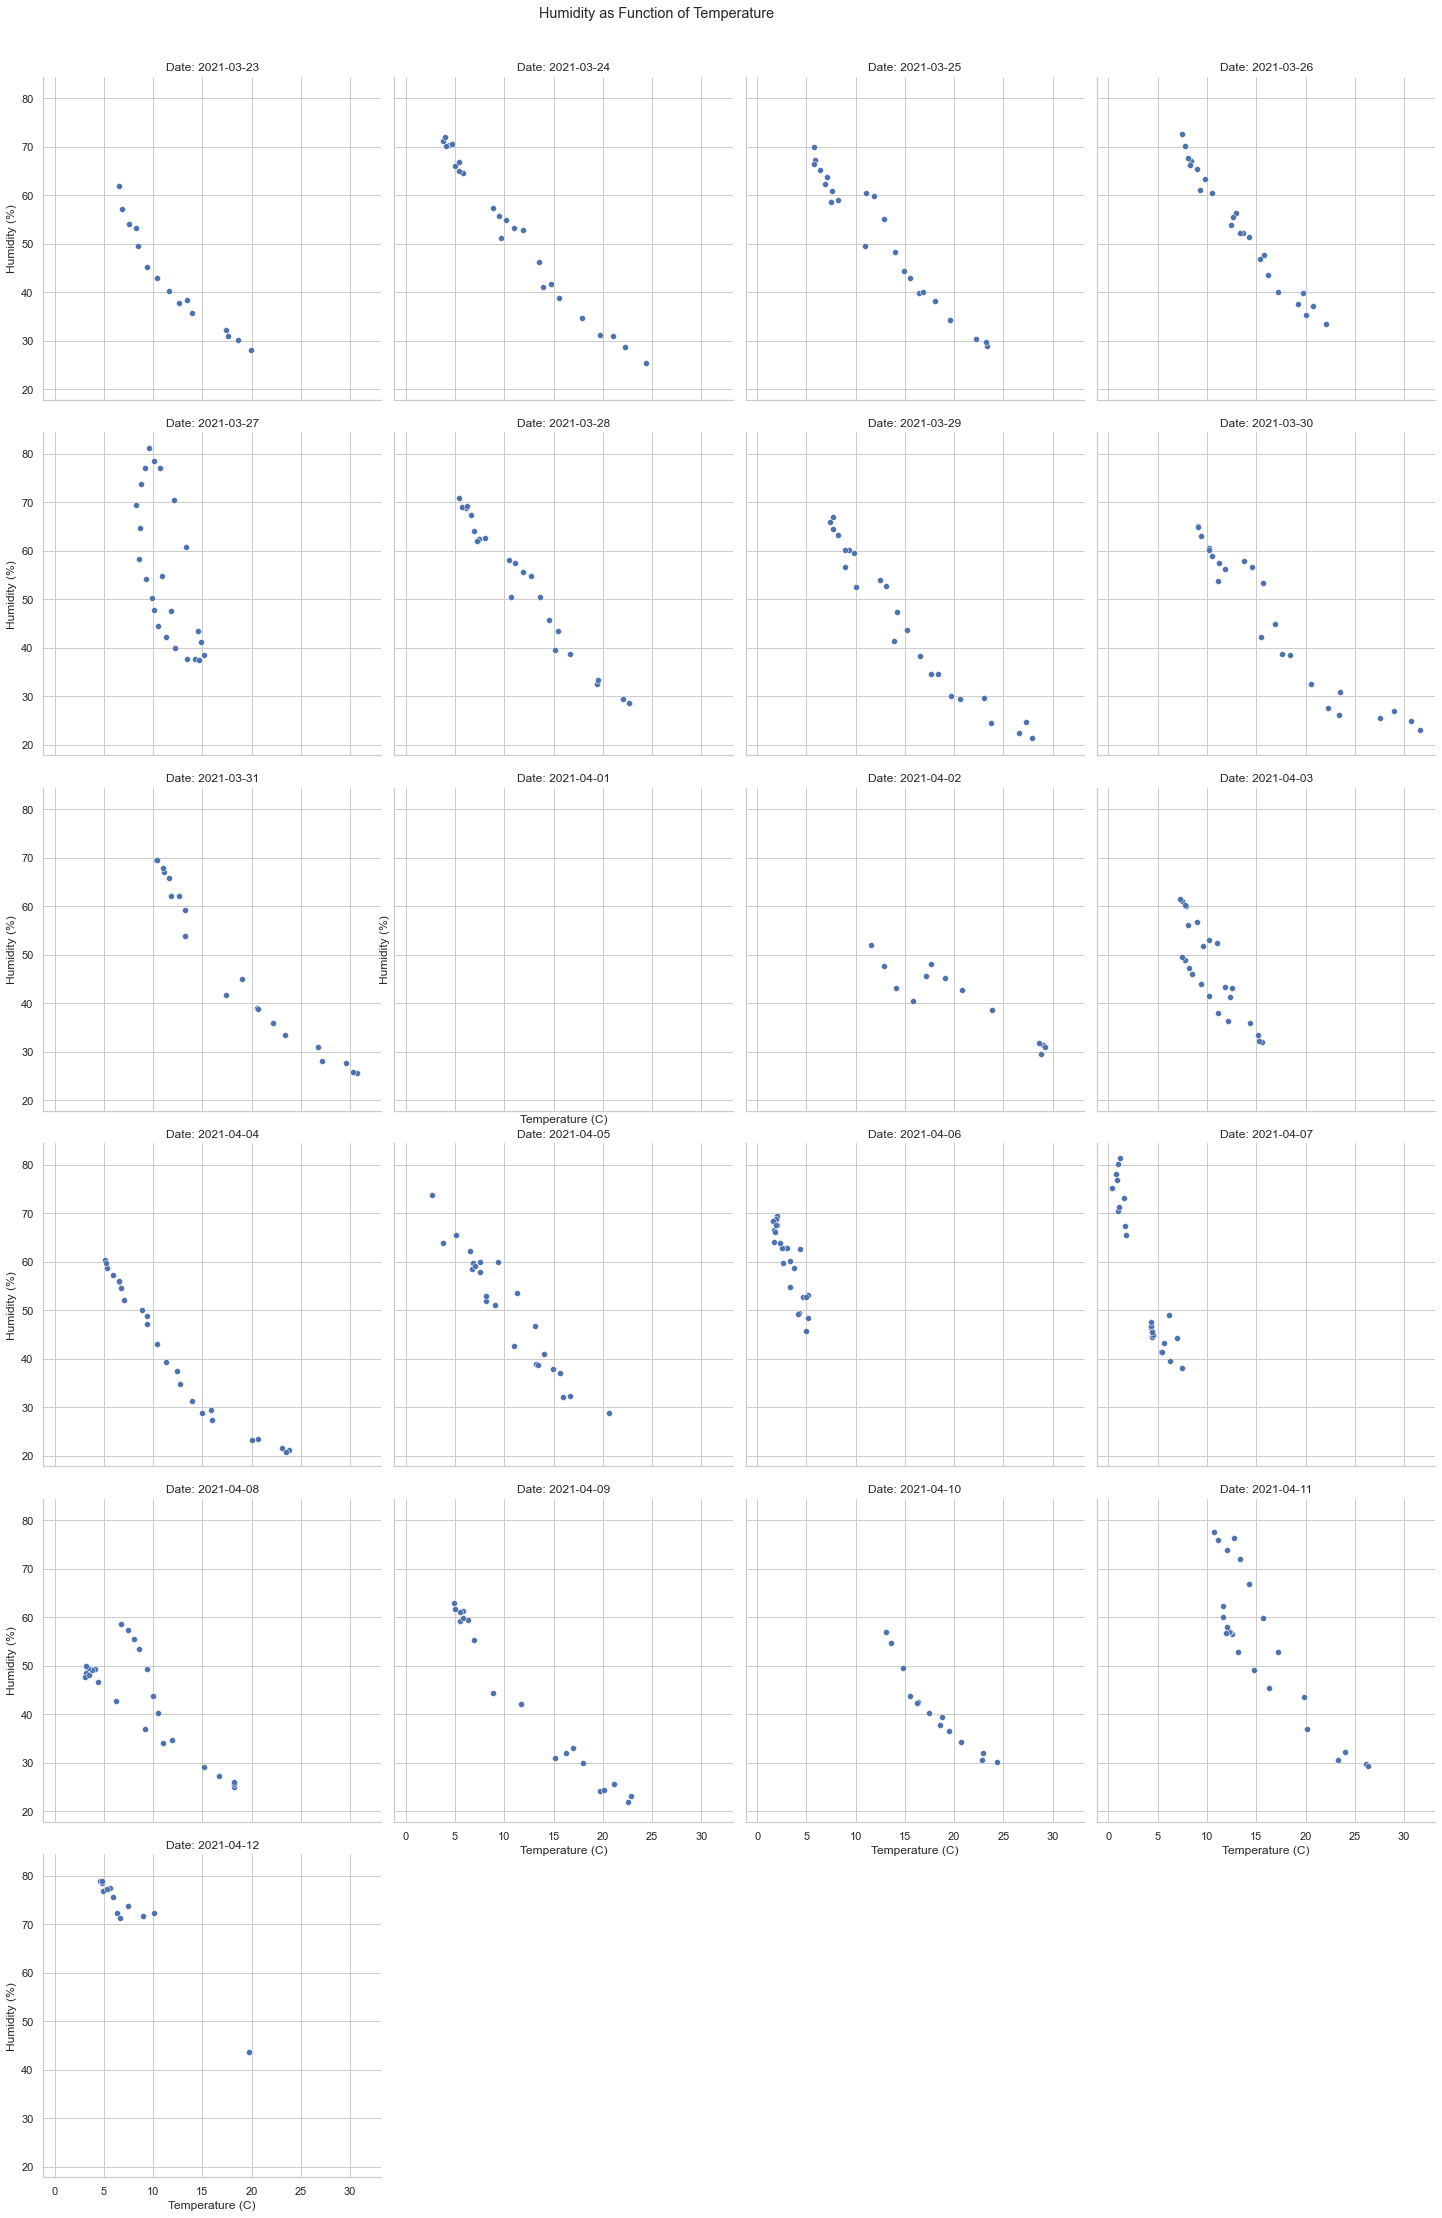

In [5]:
# temperature vs. humidity by day; joint plot is a summary of this
sns.set_theme(style = "whitegrid")
sns.set_context("notebook")

g = sns.relplot(x = "temp_pi", y = "hum_pi", 
               col = air['date'].dt.date, col_wrap = 4, kind = "scatter",
               data = air)

g.fig.suptitle("Humidity as Function of Temperature", y = 1.02, x = 0.45)
g.set_titles("Date: {col_name}")
g.set(xlabel = "Temperature (C)", ylabel = "Humidity (%)")

plt.show()

In [458]:
# loop over date range for use in plotting each day
for i in range(23,25):
    date = "2021-03-{}".format(i)
    print(air[date].head())

                             temp_pi     hum_pi    PM1_pi   PM2.5_pi  \
time                                                                   
2021-03-23 10:00:00+01:00   8.316667  53.283333  6.042500  11.798333   
2021-03-23 11:00:00+01:00  13.408333  38.358333  4.840833  10.010000   
2021-03-23 12:00:00+01:00  17.391667  32.191667  5.140833   7.510833   
2021-03-23 13:00:00+01:00  18.650000  30.083333  3.752500   6.064167   
2021-03-23 14:00:00+01:00  19.983333  28.125000  4.610000  10.042500   

                             PM10_pi  temp_blue  precip  hum_blue  wind_speed  \
time                                                                            
2021-03-23 10:00:00+01:00  17.710000   3.106314     0.0      76.0    5.116561   
2021-03-23 11:00:00+01:00  15.388333   5.416314     0.0      67.0    6.924738   
2021-03-23 12:00:00+01:00   9.632500   7.216313     0.0      55.0    7.421590   
2021-03-23 13:00:00+01:00   8.284167   8.656314     0.0      48.0    6.952755   
2021-03-2

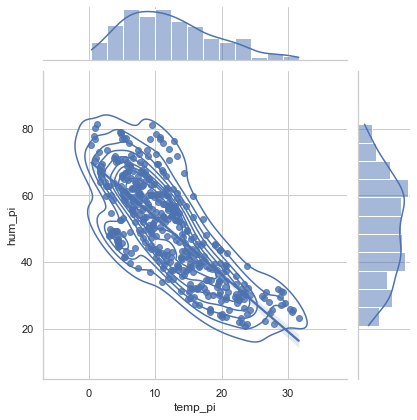

In [15]:
g = sns.jointplot(data = air, x = 'temp_pi', y = 'hum_pi', kind = "reg").plot_joint(sns.kdeplot)

##sns.jointplot(data = air, x = 'PM10', y = 'AQI', kind= "reg").plot_joint(sns.kdeplot)

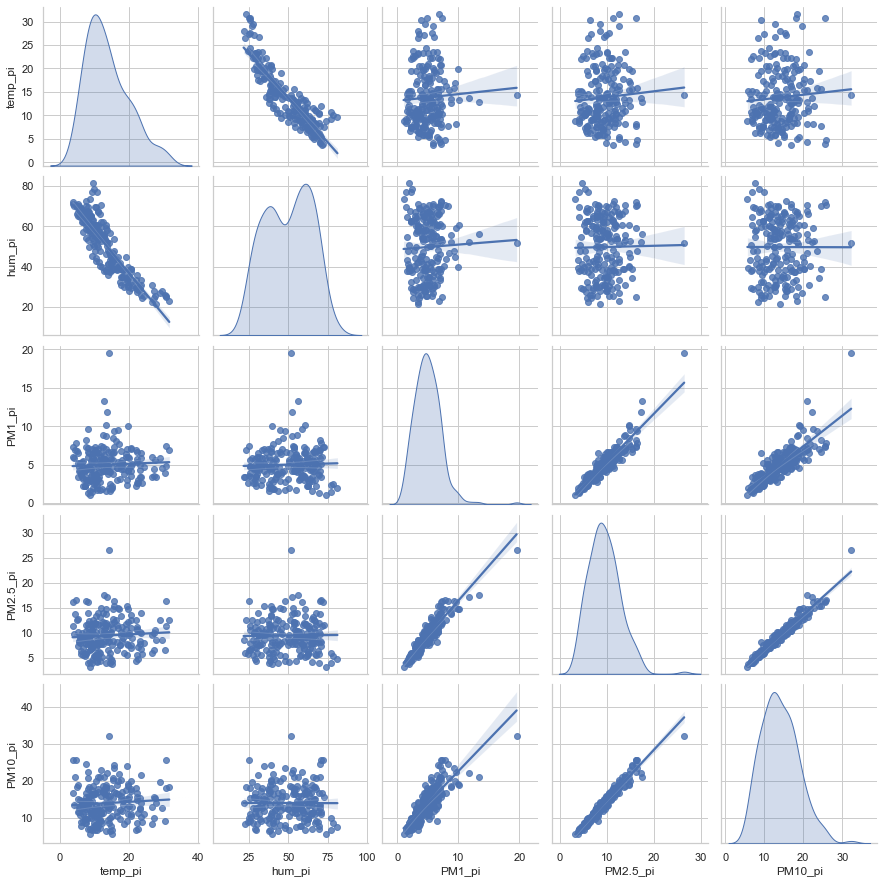

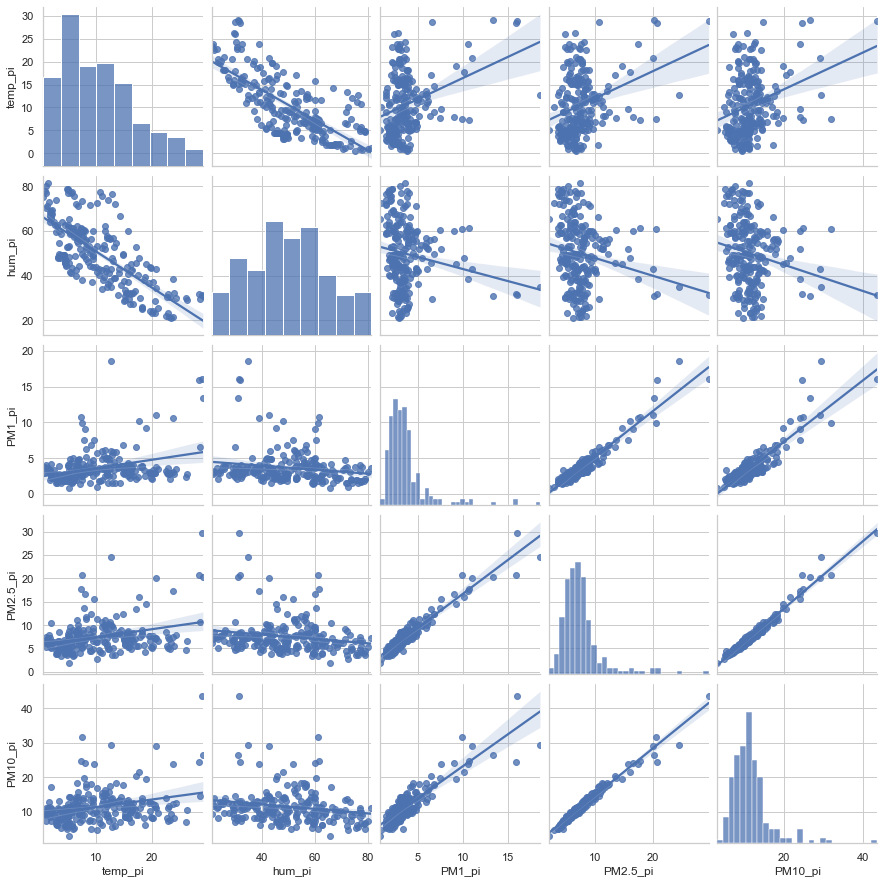

In [7]:
# can also filter using df.query('X < ###')
#march
g.march = sns.pairplot(air.query('date.dt.month == 3'),  vars = ["temp_pi", "hum_pi", "PM1_pi", "PM2.5_pi", "PM10_pi"],
                 kind = "reg", diag_kind = "kde")
#april
g.april = sns.pairplot(air.query('date.dt.month == 4'),  vars = ["temp_pi", "hum_pi", "PM1_pi", "PM2.5_pi", "PM10_pi"],
                       kind = "reg", diag_kind = "hist")

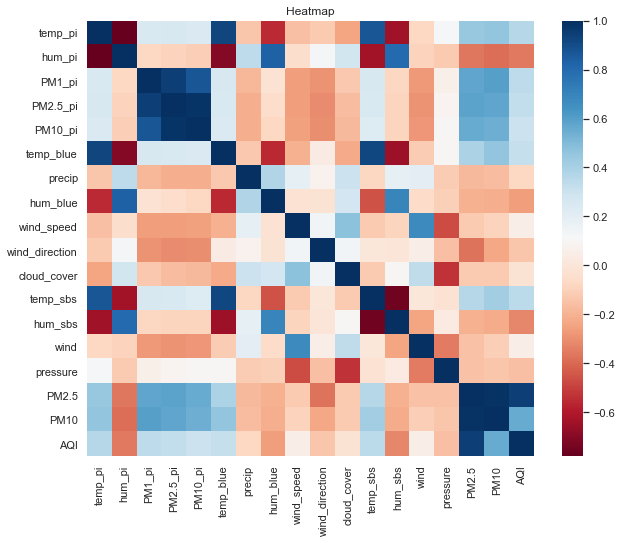

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches([10, 8])

sns.heatmap(air.corr(), cmap="RdBu")
plt.title('Heatmap')
plt.show()

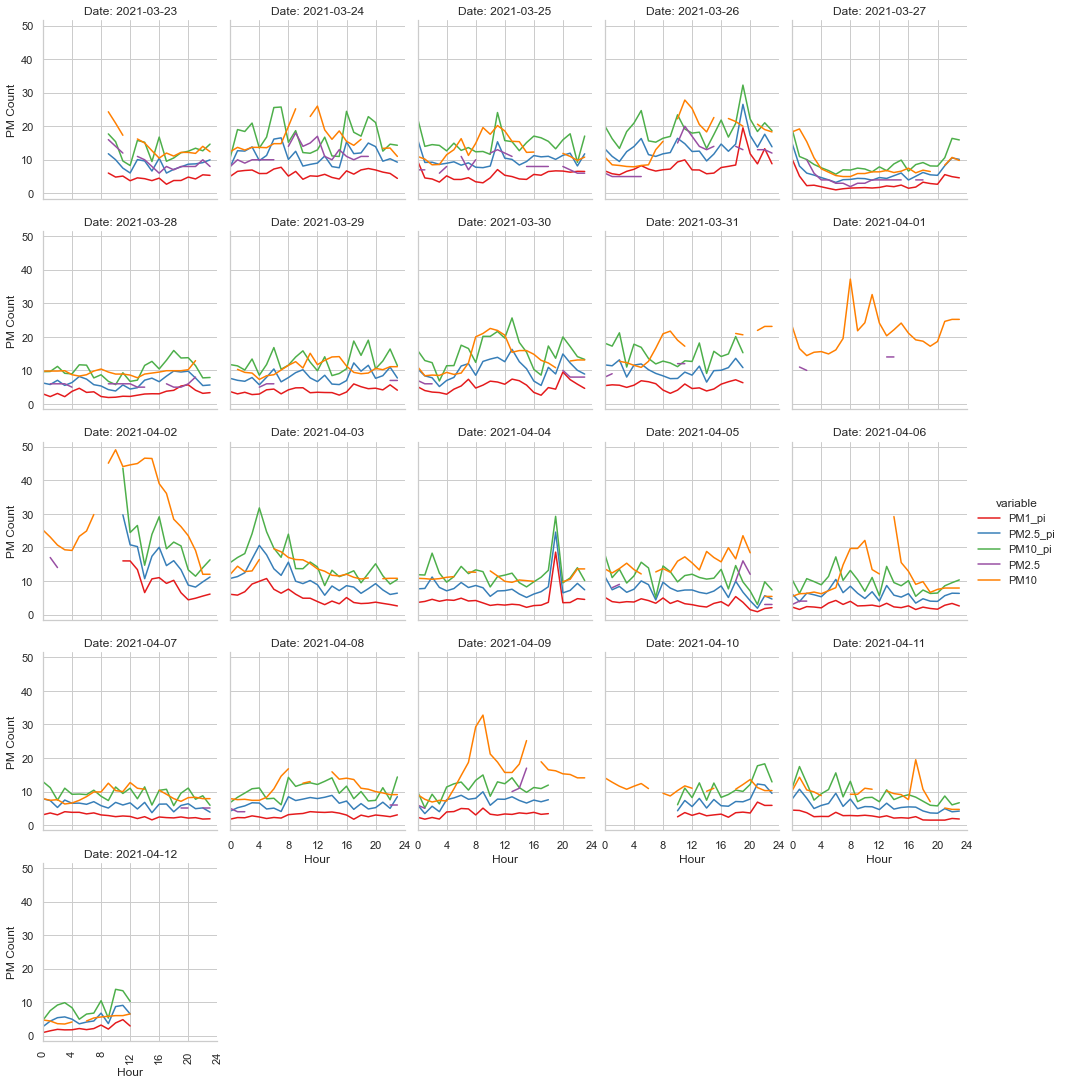

In [9]:
# Show plots of all PM data to look for missing values, strange trends

g = sns.relplot(x = air_melt_PM['date'].dt.hour, palette = "Set1",
                y = "value", kind = "line", hue = 'variable', 
                col = air_melt_PM['date'].dt.date, col_wrap = 5,
                height=3, aspect=.9, linewidth=1.5,
                data = air_melt_PM)

#g.fig.suptitle("PM1, PM2.5, PM10", y = 1.01, x = 0.45)
g.set(xlabel = "Hour", ylabel = "PM Count", xlim=(0, 24), xticks = [0,4,8,12,16,20,24])
g.set_titles("Date: {col_name}")
#g.set_xticklabels(rotation=45)

plt.xticks(rotation=90);

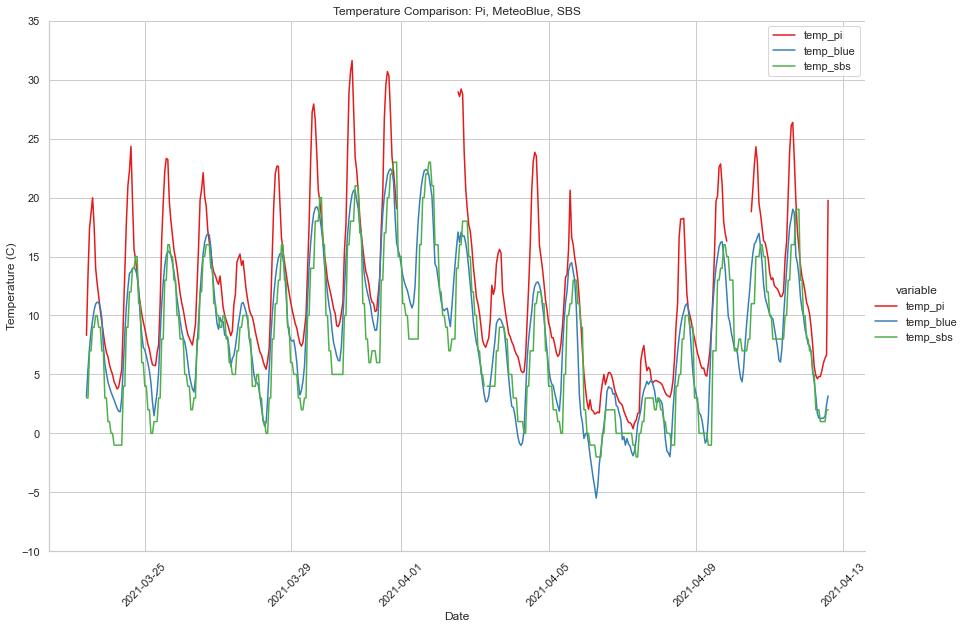

In [11]:
air_melt_temp = pd.melt(air, value_vars = ['temp_pi', 'temp_blue', 'temp_sbs'], ignore_index = False)

g = sns.relplot(data = air_melt_temp, x = air_melt_temp.index, y = 'value', 
                hue  = 'variable', palette = 'Set1',
                kind = "line", height = 8, aspect= 1.5 )

g.set(xlabel = "Date", ylabel = "Temperature (C)", 
      ylim=(-5, 35), yticks = np.arange(-10,36,5))

plt.title("Temperature Comparison: Pi, MeteoBlue, SBS")
plt.legend(loc = "best")
plt.xticks(rotation=45);